## Import libraries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Assigning the data - X and y

In [2]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

## Plot the data, to view the shape
### Seems like linear regression will be a good option

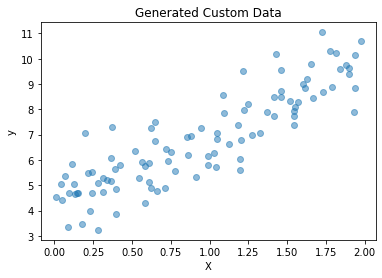

X:  [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]]
y:  [[6.33428778]
 [9.40527849]
 [8.48372443]
 [5.60438199]
 [4.71643995]
 [5.29307969]
 [5.82639572]
 [8.67878666]
 [6.79819647]
 [7.74667842]]


In [3]:
plt.scatter(X, y, alpha = 0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Custom Data')
plt.show()

print("X: ", X[:10])
print("y: ", y[:10])

## Initializing the Error/Cost/Loss Function

In [4]:
def compute_cost(X, y, theta):
    """
    Compute the cost function (Mean Squared Error)
    """
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

## Apply Gradient Descent

In [5]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    """
    Implement gradient descent to minimize the cost function
    """
    m = len(y)
    cost_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

## Assigning the beta (beta_1 and beta_0)

In [6]:
X_b = np.c_[np.ones((m, 1)), X]
beta = np.random.randn(2, 1)

In [7]:
alpha = 0.1 # For gradient descent
num_iterations = 1000 # Total number of iterations

In [8]:
theta_optimal, cost_history = gradient_descent(X_b, y, beta, alpha, num_iterations)

In [9]:
theta_optimal, cost_history[-1]

(array([[4.21509609],
        [2.77011344]]),
 0.4032922819835273)

## Plotting the regression line on data.

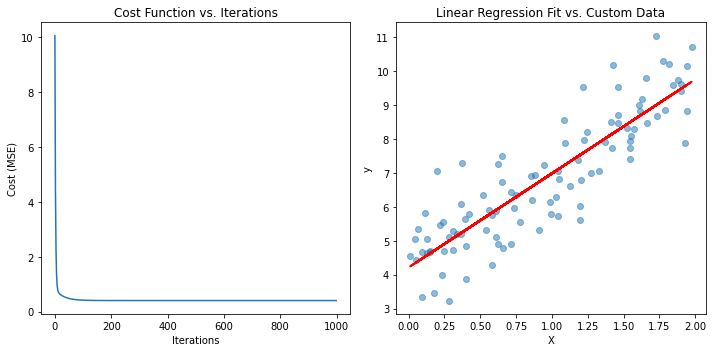

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function vs. Iterations')

plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.5)
plt.plot(X, X_b.dot(theta_optimal), color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit vs. Custom Data')

plt.tight_layout()
plt.show()